<a href="https://colab.research.google.com/github/Arbin97/Dummy_Projects/blob/master/TwitterSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Mini Project on analysis of sentinment of tweets on the twitter using Twitter APIs and the tweets


In [0]:
#Import necessart libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [0]:
#connecting with the twitter APIs
consumerKey="TbnPV9p9oJHloTuEiylgyBpqO"
consumerSecretKey="eMDj1PNzdQUDrLyJlY2HD03qFp8EOmz016TetKPYuKerdxXpFs"
accessKey="1226475151186747393-1f11q0L9LGL3XuG3PEsF4SgqHG99dq"
accessSecretKey="y7DtGMhECN2XIP3pZmA6t2uLEnMHuvy4lKVfyTlbHK5Ok"



In [0]:
#Getting Authentication from the twitter
auth=tweepy.OAuthHandler(consumerKey,consumerSecretKey)
auth.set_access_token(accessKey,accessSecretKey)
#creater API
api= tweepy.API(auth,wait_on_rate_limit=True)


In [9]:
#Getting the user/response from the twitter
post=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

#print some tweets from BillGates
print("Showing some tweets from the user:\n")
i=1;
for tweet in post[0:5]:
  print(str(i)+')' + tweet.full_text +'\n')
  i+=1

Showing some tweets from the user:

1)RT @gatesfoundation: Today world leaders pledged to fully support @gavi’s mission to give more children access to lifesaving vaccines and b…

2)RT @melindagates: The video of George Floyd’s brutal death broke my heart. I’ve watched the protests that followed and have felt overwhelme…

3)I continue to be inspired by all of the volunteers (including many retired health care workers and teachers) on the front lines of the fight against coronavirus each day. https://t.co/l38koBgE1P

4)Here are five books to read this summer if you want to learn more about pandemics or are looking for a distraction: https://t.co/B5AX6d7uah https://t.co/jSvUXQ3Buo

5)Melinda recommended that I read The Choice, and I’m glad she did. I think many people will find comfort right now from Dr. Edith Eva Eger's suggestions on how to handle difficult situations. https://t.co/GzeUnPsw1w



In [10]:
#Managing the tweets using Python Magic
#creating dataframe with column named tweets
df= pd.DataFrame([tweet.full_text for tweet in post],columns=['Tweets'])
#showing first 5 tweets
df.head()

,Tweets
0,RT @gatesfoundation: Today world leaders pledg...
1,RT @melindagates: The video of George Floyd’s ...
2,I continue to be inspired by all of the volunt...
3,Here are five books to read this summer if you...
4,"Melinda recommended that I read The Choice, an..."


In [13]:
#cleaning the tweets

def cleaningTweets(text):
  text= re.sub(r'@[A-Za-z0-9]+','',text)    #Remove the @mentionedpeople with blank ''
  text=re.sub(r'#','',text)   #remove the hastags from the tweets
  text= re.sub(r'RT[\s]+','',text)  #remove the RT
  text= re.sub(r'https?:\/\/\S+','',text) #remove any hyper links
  return text
df['Tweets']=df['Tweets'].apply(cleaningTweets)

#show the cleaned text
df

,Tweets
0,: Today world leaders pledged to fully support...
1,: The video of George Floyd’s brutal death bro...
2,I continue to be inspired by all of the volunt...
3,Here are five books to read this summer if you...
4,"Melinda recommended that I read The Choice, an..."
...,...
95,Diane Tavenner had a simple but very ambitious...
96,I’ve read a lot of great books this year. Here...
97,I'm a big fan of and was excited when they as...
98,"Thank you, Sue, for your extraordinary leaders..."


In [14]:
#Function which will tell subjectivity of the tweet which tells how a person feels and Polarity tells the +ve,netural,-ve sense of the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#creating 2 columns for subjectivity and Polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']= df['Tweets'].apply(getPolarity)

#showing the subjectivity and Polarity of the tweets
df.head()

,Tweets,Subjectivity,Polarity
0,: Today world leaders pledged to fully support...,0.500000,0.500000
1,: The video of George Floyd’s brutal death bro...,1.000000,-0.875000
2,I continue to be inspired by all of the volunt...,0.500000,0.500000
3,Here are five books to read this summer if you...,0.500000,0.500000
4,"Melinda recommended that I read The Choice, an...",0.758929,0.196429


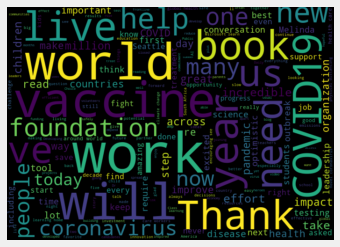

In [17]:
#Plotting with Word Cloud
#word cloud is like a cloud in which the most used words appers bigger than the rest 
allwords= ' '.join([tweets for tweets in df['Tweets']])
wordCloud= WordCloud(width=700,height=500,random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
#Function to get the Sentiments of the tweets negative, neutral, positive
def getReaction(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
#creating column for Reaction
df['Reaction']= df['Polarity'].apply(getReaction)

#showing 5 responses
df.head()


,Tweets,Subjectivity,Polarity,Reaction
0,: Today world leaders pledged to fully support...,0.500000,0.500000,Positive
1,: The video of George Floyd’s brutal death bro...,1.000000,-0.875000,Negative
2,I continue to be inspired by all of the volunt...,0.500000,0.500000,Positive
3,Here are five books to read this summer if you...,0.500000,0.500000,Positive
4,"Melinda recommended that I read The Choice, an...",0.758929,0.196429,Positive


In [23]:
#Printing all positive tweets
count =1
sortedDf= df.sort_values(by=['Polarity'])    #sorts the value in dataframe by polarity
for i in range(0,sortedDf.shape[0]):
  if sortedDf['Reaction'][i]=='Positive':

    print(str(count)+') '+ sortedDf['Tweets'][i])
    print()
    count+=1

1) : Today world leaders pledged to fully support ’s mission to give more children access to lifesaving vaccines and b…

2) I continue to be inspired by all of the volunteers (including many retired health care workers and teachers) on the front lines of the fight against coronavirus each day. 

3) Here are five books to read this summer if you want to learn more about pandemics or are looking for a distraction:  

4) Melinda recommended that I read The Choice, and I’m glad she did. I think many people will find comfort right now from Dr. Edith Eva Eger's suggestions on how to handle difficult situations. 

5) Today is RedNoseDay. Their work has made an incredible impact to reduce child poverty in the US and around the world. 

6) The 1918 influenza outbreak is the closest comparison to what we’re living through right now. John Barry does a great job explaining the realities and lessons of that devastating pandemic. 

7) Most of my conversations these days are about COVID-19 and how we

In [24]:
#Printing the negative tweets
count=1
sortedDF= df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Reaction'][i])=='Negative':
    print(str(count)+') '+ sortedDF['Tweets'][i])
    print()
    count+=1

1) : The video of George Floyd’s brutal death broke my heart. I’ve watched the protests that followed and have felt overwhelme…

2) I’m hopeful that this program will improve our understanding of the coronavirus outbreak in Seattle and provide valuable information about the virus for other communities around the world. 

3) Class of 2020, these are not easy times. But we will get through them. And with your leadership, the world will be stronger than before. 

4) Halting funding for the World Health Organization during a world health crisis is as dangerous as it sounds. Their work is slowing the spread of COVID-19 and if that work is stopped no other organization can replace them. The world needs  now more than ever.

5) I always enjoy chatting with , even though we had to sit a little bit further apart than usual this time. 

6) Extreme physical distancing measures will make a big difference in the U.S., but we need a consistent nationwide approach. Until the case numbers start to go 

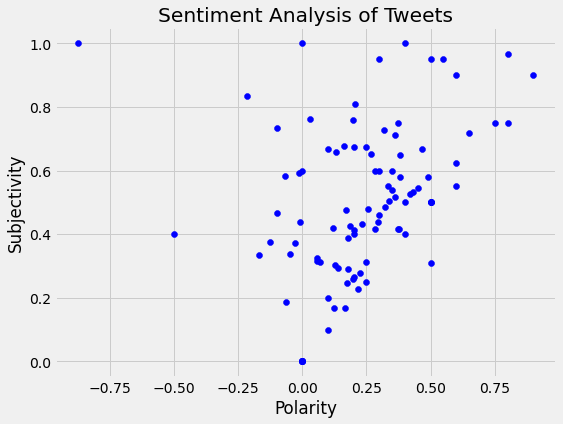

In [27]:
#Plotting the Polarity and Subjectivity of the tweets
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='Blue')
plt.title("Sentiment Analysis of Tweets")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [35]:
#Get the percentage of different Polarity of the tweets
postweets= df[df.Reaction=='Positive']
postweets= postweets['Tweets']
#%of the tweets positive one
round(postweets.shape[0]/df.shape[0]*100,1)




77.0

In [36]:
#Get percentage of Negative tweets
neg=df[df.Reaction=='Negative']
neg==neg['Tweets']

round((neg.shape[0]/df.shape[0] *100), 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


13.0

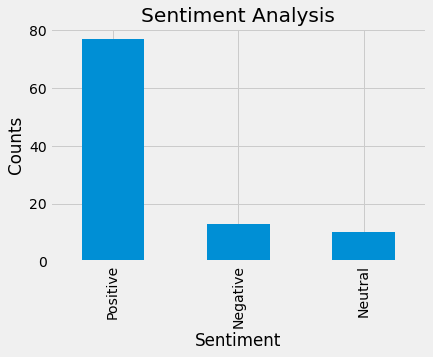

In [37]:
#Plotting the count of tweets
df['Reaction'].value_counts()
#plot
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Reaction'].value_counts().plot(kind='bar')
plt.show()